# Random walk with boundary: 
# Convergence to equilibrium and ergodic averages

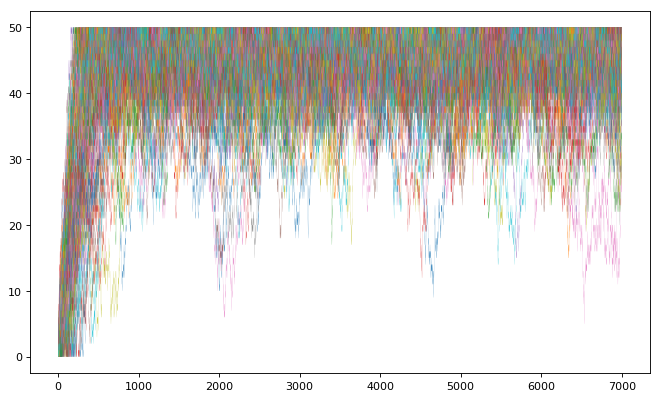

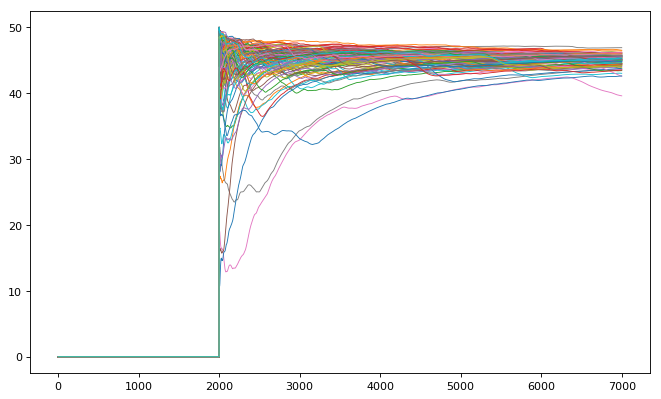

In [6]:
# Simulation of random walks with reflecting boundary at 0 and N and their ergodic averages

import numpy as np 
# makes numpy routines and data types available as np.[name ouf routine or data type]

import matplotlib.pyplot as plt 
# makes plotting command available as plt.[name of command]

x0 = 0.
# initial value at time t=0 

burnin = 2000
# the number of steps at the beginning that are not taken into account for ergodic averages

equilibriumsteps = 5000
# the number of steps that are taken into account for ergodic averages

steps = burnin + equilibriumsteps
# produce simulation with this number of steps

k = 100
# number of samples that will be simulated

N = 50

noise = np.random.choice(2,size=(steps,k),p=(0.45,0.55))
# create a steps times k dimensional matrix of Bernoulli samples

sde = np.ones((steps+1,k))
sde = sde*x0
    
ergodicaverage = np.zeros((steps+1,k))

for n in range(burnin):
    sde[n+1] = np.abs(N-np.abs(N-(sde[n]+2*noise[n]-1)))
    
ergodicaverage[burnin] = sde[burnin]

for n in range(burnin,steps):
    sde[n+1] = np.abs(N-np.abs(N-(sde[n]+2*noise[n]-1)))
    
    ergodicaverage[n+1] = ((n+1-burnin)*ergodicaverage[n]+sde[n+1])/(n+2-burnin)
    
t = np.arange(0,steps+1,1)
# creates vector of time points

plt.figure(figsize=(10,6), dpi=80)
# sets size of plot
plt.plot(t,sde,linewidth=0.1)
# produces a plot of the sample solutions in the components of sde 
# versus t with thin lines
plt.show()
# output of plot 

plt.figure(figsize=(10,6), dpi=80)
# sets size of plot
plt.plot(t,ergodicaverage,linewidth=0.8)
# produces a plot of the sample solutions in the components of sde 
# versus t with thin lines
plt.show()
# output of plot 
    
   